Naive Bayes is a probabilistic machine learning algorithm used for classification and text analysis. It is based on Bayes' theorem and is known for its simplicity, speed, and effectiveness, especially in natural language processing tasks. Naive Bayes is particularly well-suited for text classification tasks like spam detection and sentiment analysis.

Multinomial Naive Bayes: Used for text classification problems where features represent the frequency of words or other discrete data. It's commonly used in document classification and spam detection.

Gaussian Naive Bayes: Assumes that the features follow a Gaussian (normal) distribution. It's suitable for continuous data features.

Bernoulli Naive Bayes: Similar to Multinomial Naive Bayes but used for binary data, where features are either present (1) or absent (0).

<img src="https://mlarchive.com/wp-content/uploads/2023/02/Implementing-Naive-Bayes-Classification-using-Python-1-1.png" style="width:400px;height:200px;">
<h1 color="blue">Naive Bayes</h1>

In [1]:
#naive bayes - festures are independent to each other 
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\Bezawada\Downloads\titanic (1).csv")

In [2]:
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [3]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis = 'columns',inplace = True )

In [4]:
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [9]:
dummies = pd.get_dummies(df['Sex'])

In [11]:
dummies.head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [12]:
input = df.drop(['Survived'],axis = 'columns')
input.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [13]:
input= pd.concat([input,dummies],axis= 'columns')
input.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,False,True
1,1,female,38.0,71.2833,True,False
2,3,female,26.0,7.9250,True,False
3,1,female,35.0,53.1000,True,False
4,3,male,35.0,8.0500,False,True


In [14]:
input.drop('Sex',axis = 'columns',inplace = True)
input.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,False,True
1,1,38.0,71.2833,True,False
2,3,26.0,7.9250,True,False
3,1,35.0,53.1000,True,False
4,3,35.0,8.0500,False,True


In [16]:
input.columns[input.isna().any()]

Index(['Age'], dtype='object')

In [17]:
input.Age = input.Age.fillna(input.Age.mean())
input.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,False,True
1,1,38.0,71.2833,True,False
2,3,26.0,7.9250,True,False
3,1,35.0,53.1000,True,False
4,3,35.0,8.0500,False,True


In [18]:
y = df['Survived']

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(input,y,test_size = 0.3) 

In [23]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [24]:
model.fit(x_train,y_train)

GaussianNB()

In [25]:
model.score(x_test,y_test)

0.746268656716418

In [26]:
model.predict(x_test)

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [27]:
model.predict_proba(x_test[:10])

array([[2.90820200e-03, 9.97091798e-01],
       [9.93630796e-01, 6.36920392e-03],
       [9.94163663e-01, 5.83633711e-03],
       [9.85209501e-01, 1.47904986e-02],
       [3.84486830e-05, 9.99961551e-01],
       [3.49778834e-02, 9.65022117e-01],
       [9.50714303e-01, 4.92856971e-02],
       [6.02038128e-02, 9.39796187e-01],
       [1.56464508e-03, 9.98435355e-01],
       [2.74095869e-02, 9.72590413e-01]])

In [29]:
y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[126,  33],
       [ 35,  74]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

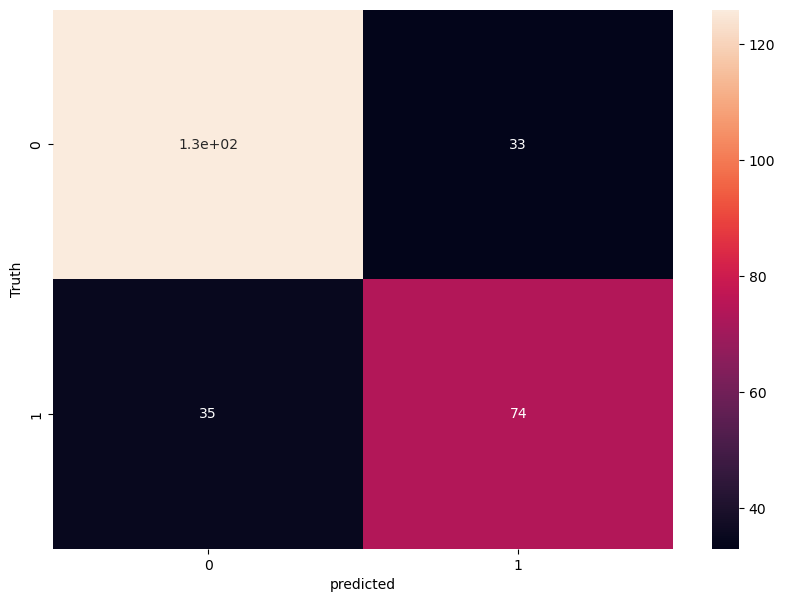

In [31]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot = True)
plt.xlabel('predicted')
plt.ylabel('Truth')